In [6]:
#교차검증
import pandas as pd

df = pd.read_csv('c:/data/customer/customer.csv')
df.columns
print(len(df.columns))

17


In [10]:
cols =df.columns[:16]
X = df[cols]
y = df['Churn']
y.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [11]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp = pd.DataFrame(data=X_sample, columns=cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Churn'])
df_samp = pd.concat([X_samp, y_samp], axis=1)
df_samp['Churn'].value_counts()

0    483
1    483
Name: Churn, dtype: int64

In [12]:
X = df_samp[cols]
y=df_samp['Churn']

<AxesSubplot:>

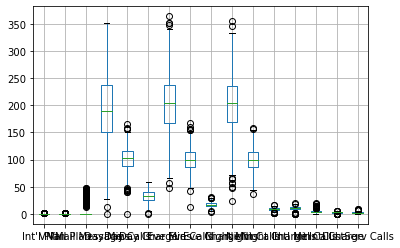

In [13]:
%matplotlib inline
X.boxplot()

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))

<AxesSubplot:>

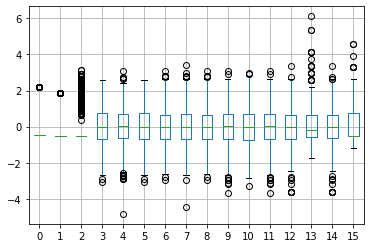

In [15]:
X_scaled.boxplot()

In [16]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

svm = SVC()
n_estimators = 10
model = BaggingClassifier(base_estimator=svm,
n_estimators = n_estimators,
max_samples = 1/n_estimators,
n_jobs=2)

In [19]:
%matplotlib inline
import numpy as np
import math
from sklearn.model_selection import cross_val_score

costs = np.logspace(-10, 3, 14)
scores = []
for c in costs:
    model.base_estimator.C = c
    #cross_val_score 교차검증
    this_scores = cross_val_score(model, X_scaled, y, n_jobs=2, cv=3)
    m = np.mean(this_scores)
    print(c, '==>', m)
    scores.append(m)

print('max:', max(scores))
print('idx:', np.argmax(scores)) #최대값의 위치
print('C:', costs[np.argmax(scores)])

1e-10 ==> 0.5
1e-09 ==> 0.5
1e-08 ==> 0.5
1e-07 ==> 0.5496894409937888
1e-06 ==> 0.5
1e-05 ==> 0.5
0.0001 ==> 0.5600414078674948
0.001 ==> 0.6304347826086957
0.01 ==> 0.5
0.1 ==> 0.5848861283643892
1.0 ==> 0.7939958592132506
10.0 ==> 0.8053830227743272
100.0 ==> 0.8064182194616977
1000.0 ==> 0.8167701863354037
max: 0.8167701863354037
idx: 13
C: 1000.0


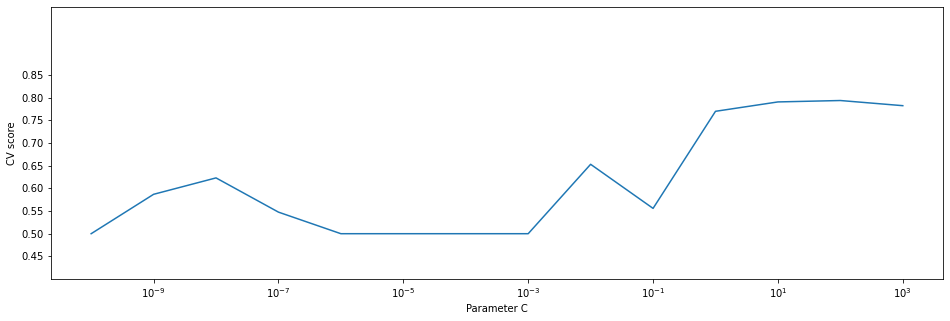

In [18]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(16,5)
plt.semilogx(costs, scores)
locs, labels = plt.yticks()
plt.yticks(locs)
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0.4, 1)
plt.show()